
Провести базовый EDA (https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
    
    
данные по фильмам и сериалам Netflix https://www.kaggle.com/shivamb/netflix-shows

    
    
    

Варианты для визуализаций

Сравним фильмы из пяти стран по общему рейтингу. Столбчатая диаграмма

Те же страны и оценки их фильмов. Точечная диаграмма

Количество фильмов одного режиссера и усредненная оценка всех его фильмов. Тепловая карта

Дата выхода фильма и оценка. График


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('IMDb_movies.csv')
df.info()
df.head(30)

C:\Users\pbaho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,...,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,NaN,7.0,5.0
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,"Aristide Demetriade, Constanta Demetriade, Con...",The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,NaN,NaN,NaN,8.0,1.0


AttributeError: 'Rectangle' object has no property 'xlabel'

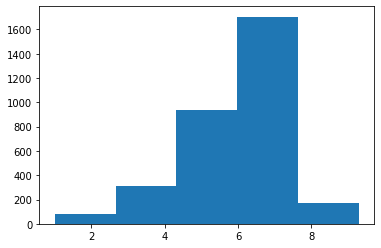

In [4]:
# Сравним фильмы из пяти стран по общему рейтингу. Столбчатая диаграмма

# Возьмем данные по 5 странам:

list_of_countries = ['Brazil', 'Mexico', 'Singapore', 'Turkey', 'Egypt']

countries_selected = df.loc[df['country'].isin(list_of_countries)]


countries_selected['avg_vote'].plot(kind='hist', 
                     bins=5,
                     title='Countries By Rating',
                     xlabel='Country',
                     ylabel='Rating',
                     xticks=range(1, 6))

In [ ]:
unique_countries = df.drop_duplicates(subset ="country", keep = 'first')
unique_countries.groupby("country").head(10)

# Фильмов из каких стран больше всего (пропорции). Столбчатая диаграмма

df['country'].plot(kind='hist', 
                   bins=11,
                   title='Films By Countries',
                   xlabel='country',
                   ylabel='Films')